In [1]:
import sys
sys.path.append('..')
import helper

tokens = helper.Vocab.tokenize(helper.Loader.read_time_machine())
corpus = [token for line in tokens for token in line]
vocab = helper.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

e:\workspace\machine-learning\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


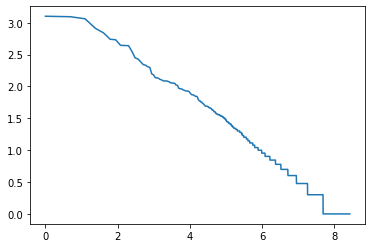

In [2]:
# 词频图
import numpy as np
from matplotlib import pyplot as plt

freqs = [freq for token, freq in vocab.token_freqs]
x = np.arange(len(freqs))
plt.plot(np.log(x), np.log10(freqs))
plt.show()

In [3]:
# 二元语法
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = helper.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [4]:
# 三元语法
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = helper.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

e:\workspace\machine-learning\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
e:\workspace\machine-learning\venv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
e:\workspace\machine-learning\venv\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


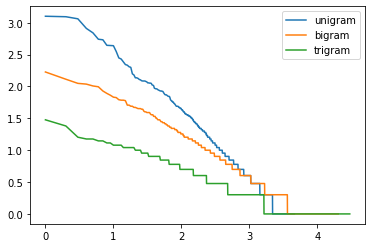

In [5]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
bigram_x = np.arange(len(bigram_freqs))
trigram_x = np.arange(len(trigram_freqs))

plt.plot(np.log10(x), np.log10(freqs), label = 'unigram')
plt.plot(np.log10(bigram_x), np.log10(bigram_freqs), label = 'bigram')
plt.plot(np.log10(trigram_x), np.log10(trigram_freqs), label = 'trigram')
plt.legend()
plt.show()

In [6]:
# 随机采样
import random
import torch
def seq_data_iter_random(corpus, batch_size, num_steps):
    corpus = corpus[random.randint(0, num_steps - 1):]
    num_subseqs = (len(corpus) - 1) // num_steps
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    random.shuffle(initial_indices)
    def data(pos):
        return corpus[pos:pos + num_steps]
    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        initial_indices_per_batch = initial_indices[i:i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

In [7]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]]) 
Y: tensor([[ 7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16]])
X:  tensor([[26, 27, 28, 29, 30],
        [16, 17, 18, 19, 20]]) 
Y: tensor([[27, 28, 29, 30, 31],
        [17, 18, 19, 20, 21]])
X:  tensor([[21, 22, 23, 24, 25],
        [ 1,  2,  3,  4,  5]]) 
Y: tensor([[22, 23, 24, 25, 26],
        [ 2,  3,  4,  5,  6]])


In [8]:
# 顺序分区
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset:offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + num_tokens + 1])
    Xs, Ys = Xs.reshape((batch_size, -1)), Ys.reshape((batch_size, -1))
    num_batchs = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batchs, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [9]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 2,  3,  4,  5,  6],
        [18, 19, 20, 21, 22]]) 
Y: tensor([[ 3,  4,  5,  6,  7],
        [19, 20, 21, 22, 23]])
X:  tensor([[ 7,  8,  9, 10, 11],
        [23, 24, 25, 26, 27]]) 
Y: tensor([[ 8,  9, 10, 11, 12],
        [24, 25, 26, 27, 28]])
X:  tensor([[12, 13, 14, 15, 16],
        [28, 29, 30, 31, 32]]) 
Y: tensor([[13, 14, 15, 16, 17],
        [29, 30, 31, 32, 33]])
